<hr>

# **Purchase Case Study**

<hr>

<hr>

# **Understanding the dataset**

* **User_ID:**
  * **This column represents the unique identifier for each user or customer who made the purchase.**

* **Product_ID:**
  * **This column contains the unique identifier for each product that was purchased.**

* **Gender:**
  * **This column indicates the gender of the user who made the purchase. It could have values such as "Male" or "Female."**

* **Age:**
  * **This column represents the age group or category of the user who made the purchase. It can be categorized into different age ranges, such as "18-25," "26-35," "36-45," and so on.**

* **Occupation:**
  * **This column denotes the occupation of the user who made the purchase. It may include numerical or categorical values representing different professions or job types.**

* **City_Category:**
  * **This column categorizes the city or region from which the purchase was made. It typically includes labels like "A," "B," or "C" to represent different city categories or types.**

* **Stay_In_Current_City_Years:**
  * **This column indicates the number of years the user has been living in their current city. It may have values such as "0" for less than a year, "1" for one year, "2" for two years, and so on.**

* **Marital_Status:**
  * **This column represents the marital status of the user. It could be encoded as "0" for unmarried/single and "1" for married.**

* **Product_Category_1:**
  * **This column refers to the primary category of the purchased product. It may contain numerical or categorical values representing different product categories.**

* **Product_Category_2:**
  * **This column corresponds to the secondary category of the purchased product. It could also contain numerical or categorical values, but it is not necessarily present in all datasets.**

* **Product_Category_3:**
  * **This column represents the tertiary category of the purchased product. Similar to the previous column, it may include numerical or categorical values and might not be present in all datasets.**

* **Purchase:**
  * **This column contains the amount or value of the purchase made by the user. It represents the monetary value or quantity associated with the transaction.**

<hr>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("purchase_data.csv")
df.shape

(263015, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
# Shape
a = df.shape
print(f"rows = {a[0]} and columns = {a[1]}")

rows = 263015 and columns = 12


In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


**Insights**
* **We don't need the User_ID and Product_ID columns**
* **Stay_In_Current_City_Years needs to worked on**

In [7]:
# Inferences
df['Stay_In_Current_City_Years'].value_counts()

1     92588
2     48580
3     45569
4+    40665
0     35612
Name: Stay_In_Current_City_Years, dtype: int64

In [8]:
# Replacing 4+ with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", "4")

In [9]:
df['Stay_In_Current_City_Years'].value_counts()

1    92588
2    48580
3    45569
4    40665
0    35612
Name: Stay_In_Current_City_Years, dtype: int64

In [10]:
df['Stay_In_Current_City_Years'].dtype

dtype('O')

In [11]:
# Converting datatype of Stay_In_Current_City_Years from object to float
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], errors = 'coerce')

In [12]:
df['Stay_In_Current_City_Years'].dtype

dtype('float64')

**Data Preprocessing**

In [13]:
# Null Values
df.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [14]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)

In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         1
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2                 0
Product_Category_3            182433
Purchase                           1
dtype: int64

In [16]:
df['Product_Category_3'].fillna(0, inplace = True)

In [17]:
df.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.shape

(263014, 12)

In [20]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
df['Age'].value_counts()

26-35    104912
36-45     52396
18-25     48193
46-50     21619
51-55     18509
55+       10321
0-17       7064
Name: Age, dtype: int64

In [22]:
df['Gender'].value_counts()

M    198488
F     64526
Name: Gender, dtype: int64

**Encoding Techniques**
* **To convert categorical data into numerical format**
* **Different Types of Categorical Data and Encoding Techniques**
  * **Ordered - Label Encoding**
  * **Unordered - One Hot Encoding (OHE)**

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# initializing the object for encoder
encoder = LabelEncoder()

In [25]:
df['Gender'] = encoder.fit_transform(df['Gender'])

In [26]:
df['Gender'].value_counts()

1    198488
0     64526
Name: Gender, dtype: int64

In [27]:
# Find which label represent which value
label = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [28]:
label

{'F': 0, 'M': 1}

In [29]:
encoder.classes_                # array of actual values

array(['F', 'M'], dtype=object)

In [30]:
encoder.transform(encoder.classes_)     # array of encoded values

array([0, 1])

In [31]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [32]:
df['City_Category'].value_counts()

B    111124
C     81100
A     70790
Name: City_Category, dtype: int64

In [33]:
df['Age'].value_counts()

26-35    104912
36-45     52396
18-25     48193
46-50     21619
51-55     18509
55+       10321
0-17       7064
Name: Age, dtype: int64

In [34]:
col_conversion_list = ['City_Category', 'Age', 'User_ID', 'Product_ID']
for x in col_conversion_list:
    df[x] = encoder.fit_transform(df[x])
    label = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(label)

{'A': 0, 'B': 1, 'C': 2}
{'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
{1000001: 0, 1000002: 1, 1000003: 2, 1000004: 3, 1000005: 4, 1000006: 5, 1000007: 6, 1000008: 7, 1000009: 8, 1000010: 9, 1000011: 10, 1000012: 11, 1000013: 12, 1000014: 13, 1000015: 14, 1000016: 15, 1000017: 16, 1000018: 17, 1000019: 18, 1000020: 19, 1000021: 20, 1000022: 21, 1000023: 22, 1000024: 23, 1000025: 24, 1000026: 25, 1000027: 26, 1000028: 27, 1000029: 28, 1000030: 29, 1000031: 30, 1000032: 31, 1000033: 32, 1000034: 33, 1000035: 34, 1000036: 35, 1000037: 36, 1000039: 37, 1000041: 38, 1000042: 39, 1000043: 40, 1000044: 41, 1000045: 42, 1000046: 43, 1000047: 44, 1000048: 45, 1000049: 46, 1000050: 47, 1000051: 48, 1000052: 49, 1000053: 50, 1000054: 51, 1000055: 52, 1000056: 53, 1000057: 54, 1000058: 55, 1000059: 56, 1000060: 57, 1000061: 58, 1000062: 59, 1000063: 60, 1000064: 61, 1000065: 62, 1000066: 63, 1000067: 64, 1000068: 65, 1000069: 66, 1000070: 67, 1000071: 68, 10000

In [35]:
# EDA
# Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,263014.0,2867.074680,1661.229012,0.0,1413.0,2892.0,4223.0,5890.0
Product_ID,263014.0,1637.825542,973.517929,0.0,885.0,1583.0,2461.0,3506.0
Gender,263014.0,0.754667,0.430285,0.0,1.0,1.0,1.0,1.0
Age,263014.0,2.494742,1.354666,0.0,2.0,2.0,3.0,6.0
Occupation,263014.0,8.083558,6.524052,0.0,2.0,7.0,14.0,20.0
City_Category,263014.0,1.039199,0.758923,0.0,0.0,1.0,2.0,2.0
Stay_In_Current_City_Years,263014.0,1.859654,1.290596,0.0,1.0,2.0,3.0,4.0
Marital_Status,263014.0,0.408685,0.491592,0.0,0.0,0.0,1.0,1.0
Product_Category_1,263014.0,5.291099,3.745722,1.0,1.0,5.0,8.0,18.0
Product_Category_2,263014.0,6.793680,6.211567,0.0,0.0,5.0,14.0,18.0


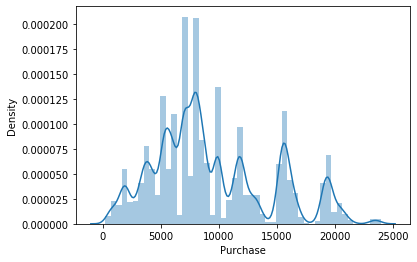

In [36]:
sns.distplot(df['Purchase'])

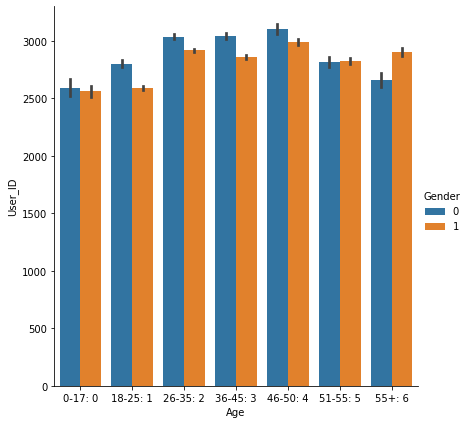

In [41]:
# Age wise comparison between male and female
fig = sns.catplot(data=df, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)
fig.set_xticklabels(['0-17: 0',
 '18-25: 1',
 '26-35: 2',
 '36-45: 3',
 '46-50: 4',
 '51-55: 5',
 '55+: 6'])

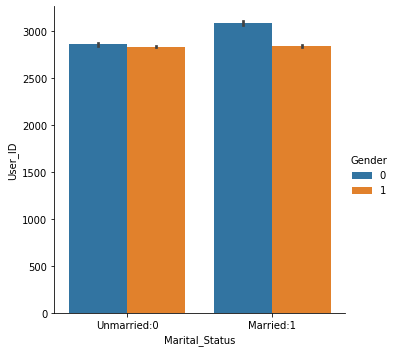

In [46]:
# Comparison by Marital Status
fig = sns.catplot(data=df, x='Marital_Status', y='User_ID', hue='Gender', kind='bar')
fig.set_xticklabels(['Unmarried:0', 'Married:1'])

In [ ]:
# To Be Continued .........................